C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\e

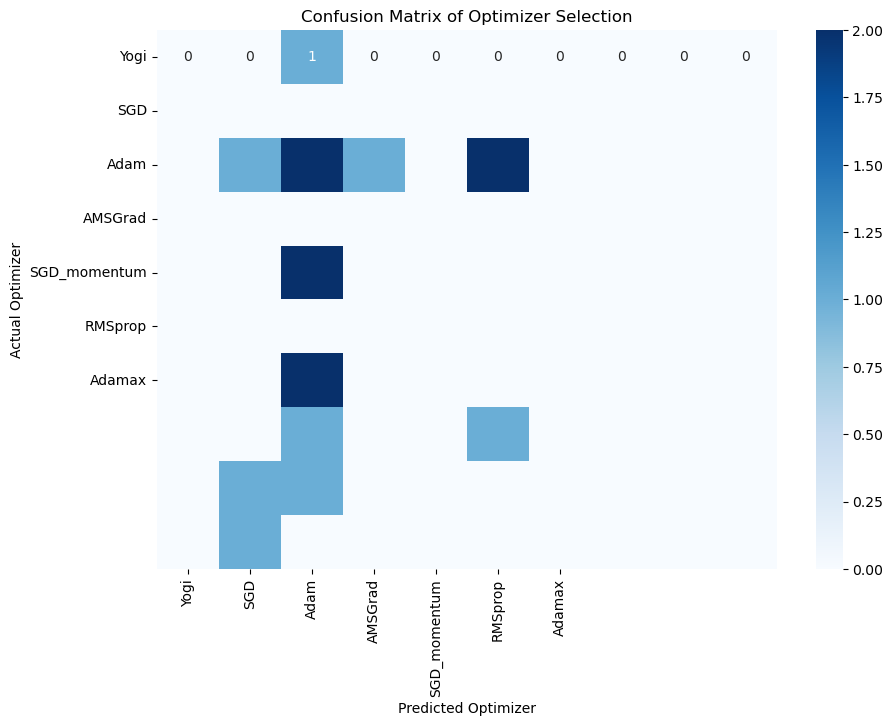

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
     Adagrad       0.00      0.00      0.00         0
        Adam       0.22      0.33      0.27         6
       AdamW       0.00      0.00      0.00         0
      Adamax       0.00      0.00      0.00         2
    Nesterov       0.00      0.00      0.00         0
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       0.00      0.00      0.00         2
        Yogi       0.00      0.00      0.00         1

    accuracy                           0.12        16
   macro avg       0.02      0.03      0.03        16
weighted avg       0.08      0.12      0.10        16



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    num_features = row['Number of Features']
    neural_network = row['Neural Network Architecture']
    
    # Recommendations based on data size and number of features
    if data_size < 1000:
        if num_features <= 15:
            if neural_network == 'FNN':
                return 'Adam'
            elif neural_network == 'CNN':
                return 'AMSGrad'
            elif neural_network == 'LSTM':
                return 'AdamW'
            else:
                return 'Adagrad'
        elif 16 <= num_features <= 30:
            if neural_network == 'FNN':
                return 'Adagrad'
            elif neural_network == 'CNN':
                return 'AMSGrad'
            else:
                return 'AdamW'
        elif num_features > 30:
            if neural_network == 'LSTM':
                return 'AdamW'
    elif data_size < 4000:
        if num_features <= 15:
            if neural_network == 'FNN':
                return 'Yogi'
        elif 16 <= num_features <= 30:
            if neural_network == 'CNN':
                return 'SGD Momentum'
            else:
                return 'Adagrad'
    elif data_size >= 4000:
        if num_features <= 15:
            if neural_network == 'LSTM':
                return 'Adam'
        elif 16 <= num_features <= 30:
            return 'Nesterov'
        elif num_features > 30:
            if neural_network == 'FNN':
                return 'Adam'

    # Default case if none of the rules match
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\e

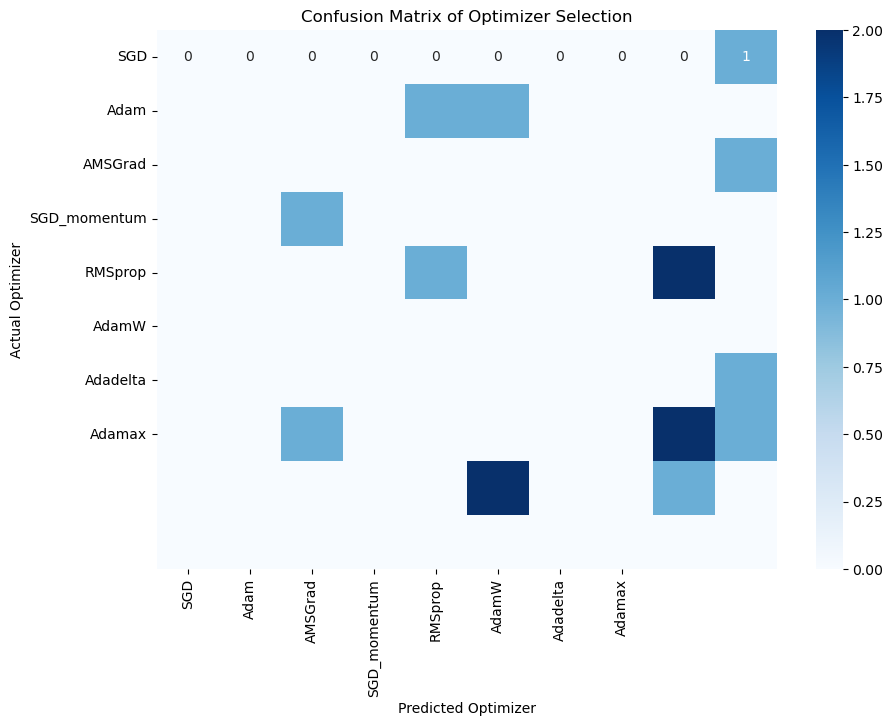

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
    Adadelta       0.00      0.00      0.00         2
        Adam       0.00      0.00      0.00         1
       AdamW       0.00      0.00      0.00         1
      Adamax       0.50      0.33      0.40         3
     RMSProp       0.00      0.00      0.00         0
     RMSprop       0.00      0.00      0.00         1
         SGD       0.00      0.00      0.00         4
SGD_momentum       0.20      0.33      0.25         3
        Yogi       0.00      0.00      0.00         0

    accuracy                           0.12        16
   macro avg       0.07      0.07      0.07        16
weighted avg       0.13      0.12      0.12        16



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, df):
    """
    Select the best optimizer based on the given data name and the information
    in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding rows for the given data name
    data_df = df[df['Data Name'] == data_name]
    
    # Extract the necessary values
    data_size = data_df['Data Size'].iloc[0]
    neural_network = data_df['Neural Network Architecture'].iloc[0]
    target_feature_type = data_df['Target Feature Type'].iloc[0]
    number_of_features = data_df['Number of Features'].iloc[0]

    # Complex decision rules based on detailed data analysis
    if data_size < 1000:
        if neural_network == 'FNN':
            if number_of_features > 50:
                return 'AdamW'
            else:
                return 'Yogi'
        elif neural_network == 'CNN':
            if target_feature_type == 'float32':
                return 'Adamax'
            else:
                return 'Adam'
        elif neural_network == 'LSTM':
            if number_of_features > 20:
                return 'Adam'
            else:
                return 'AMSGrad'
    elif data_size < 5000:
        if neural_network == 'FNN':
            if number_of_features > 100:
                return 'SGD_momentum'
            else:
                return 'Adam'
        elif neural_network == 'CNN':
            if target_feature_type == 'int32':
                return 'Adamax'
            else:
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if target_feature_type == 'Categorical':
                return 'Adam'
            else:
                return 'RMSProp'
    elif data_size >= 5000:
        if neural_network == 'FNN':
            if number_of_features > 200:
                return 'Adamax'
            else:
                return 'SGD_momentum'
        elif neural_network == 'CNN':
            if target_feature_type == 'float32':
                return 'Adamax'
            else:
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if number_of_features > 30:
                return 'Adam'
            else:
                return 'RMSProp'
    
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize the features
df['Normalized Precision'] = df['Precision'] / df['Precision'].max()
df['Normalized Recall'] = df['Recall'] / df['Recall'].max()
df['Normalized Convergence Speed'] = df['Convergence Speed'] / df['Convergence Speed'].max()

# Create a composite score
df['Composite Score'] = (df['Normalized Precision'] * 0.4 + 
                         df['Normalized Recall'] * 0.4 + 
                         df['Normalized Convergence Speed'] * 0.2)

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest Composite Score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


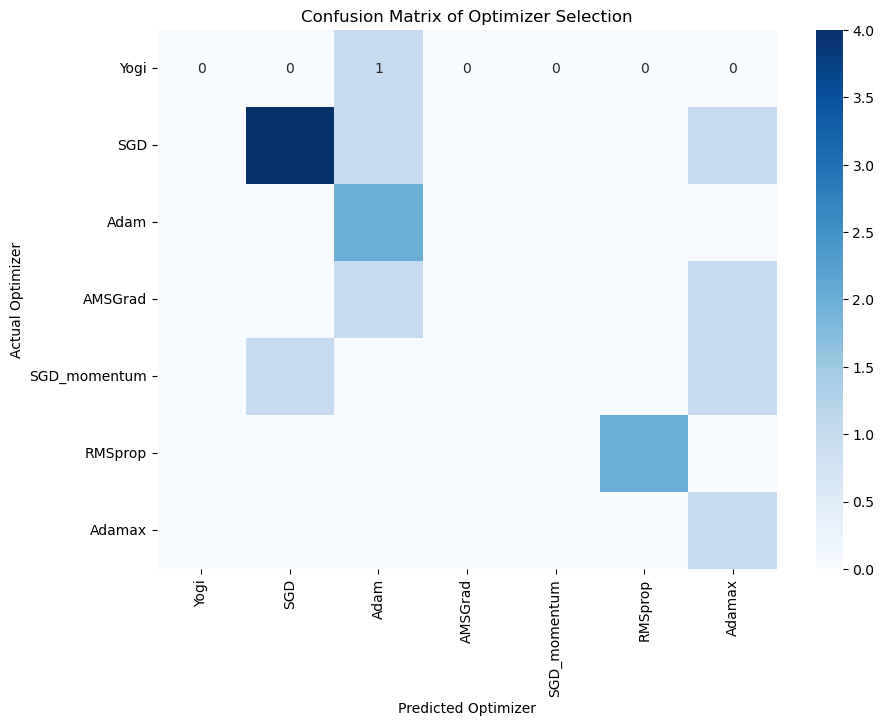

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
        Adam       0.80      0.67      0.73         6
      Adamax       0.40      1.00      0.57         2
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       1.00      1.00      1.00         2
        Yogi       0.25      1.00      0.40         1

    accuracy                           0.56        16
   macro avg       0.35      0.52      0.39        16
weighted avg       0.49      0.56      0.49        16



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding rows for the given data name
    data_df = df[df['Data Name'] == data_name]
    
    # Extract the necessary values
    data_size = data_df['Data Size'].iloc[0]
    neural_network = data_df['Neural Network Architecture'].iloc[0]
    target_feature_type = data_df['Target Feature Type'].iloc[0]

    # Complex decision rules based on data analysis
    if data_size < 1000:
        if neural_network == 'FNN':
        #     if metric == 'F1-score':
        #         if target_feature_type == 'float32':
                #     return 'Adam'
                # else:
                    return 'Yogi'
            # elif metric == 'Training Time':
            #     return 'Nesterov'
        elif neural_network == 'CNN':
            # if metric == 'F1-score':
            #     if target_feature_type == 'float32':
            #         return 'Adamax'
            #     else:
                    return 'Adam'
            # elif metric == 'Training Time':
            #     return 'Nesterov'
        elif neural_network == 'LSTM':
            # if metric == 'F1-score':
                return 'Adam'
            # elif metric == 'Training Time':
            #     return 'AMSGrad'
    elif data_size < 5000:
        if neural_network == 'FNN':
            # if metric == 'F1-score':
                return 'SGD_momentum'
            # elif metric == 'Training Time':
            #     return 'Adam'
        elif neural_network == 'CNN':
            # if metric == 'F1-score':
                return 'Adamax'
            # elif metric == 'Training Time':
            #     return 'SGD_momentum'
        elif neural_network == 'LSTM':
            # if metric == 'F1-score':
                return 'Adam'
            # elif metric == 'Training Time':
            #     return 'RMSProp'
    elif data_size >= 5000:
        if neural_network == 'FNN':
            # if metric == 'F1-score':
                return 'Adamax'
            # elif metric == 'Training Time':
            #     return 'SGD_momentum'
        elif neural_network == 'CNN':
            # if metric == 'F1-score':
                return 'Adamax'
            # elif metric == 'Training Time':
            #     return 'SGD_momentum'
        elif neural_network == 'LSTM':
            # if metric == 'F1-score':
                return 'Adam'
            # elif metric == 'Training Time':
            #     return 'RMSProp'
    
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\e

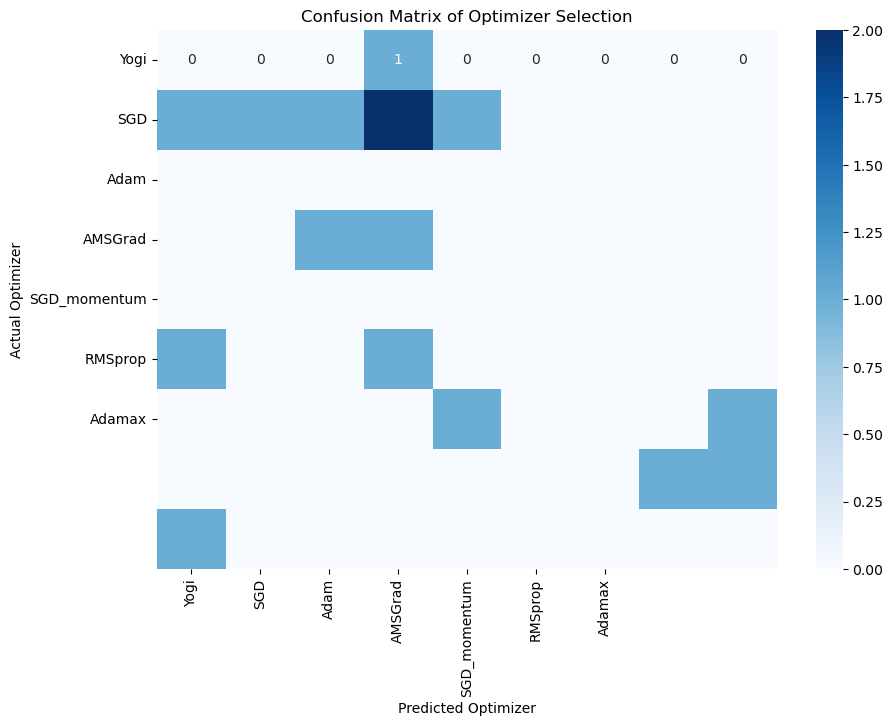

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
        Adam       1.00      0.17      0.29         6
       AdamW       0.00      0.00      0.00         0
      Adamax       0.20      0.50      0.29         2
     RMSProp       0.00      0.00      0.00         0
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       1.00      0.50      0.67         2
        Yogi       0.00      0.00      0.00         1

    accuracy                           0.19        16
   macro avg       0.24      0.13      0.14        16
weighted avg       0.53      0.19      0.23        16



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    neural_network = row['Neural Network Architecture']
    num_features = row['Number of Features']
    target_type = row['Target Feature Type']
    convergence_speed = row['Convergence Speed']

    # Define more complex rules based on multiple factors
    if data_size < 1000:
        if neural_network == 'FNN':
            if target_type == 'float32':
                if convergence_speed < 30:
                    return 'Adam'
                else:
                    return 'Yogi'
            else:
                return 'AMSGrad'
        elif neural_network == 'CNN':
            if num_features > 30:
                return 'Adamax'
            else:
                return 'Nadam'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'AdamW'
            else:
                return 'AMSGrad'
    elif data_size < 5000:
        if neural_network == 'FNN':
            if num_features > 20:
                return 'SGD_momentum'
            else:
                return 'Yogi'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adamax'
            else:
                return "SGD_momentum"
        elif neural_network == 'LSTM':
            if target_type == 'Categorical':
                return 'Adam'
            else:
                return 'RMSProp'
    else:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'AdamW'
            else:
                return 'SGD_momentum'
        elif neural_network == 'CNN':
            if num_features > 30:
                return 'Adamax'
            else:
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if target_type == 'Categorical':
                return 'Adam'
            else:
                return 'RMSProp'
    
    # Default case if none of the rules match
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


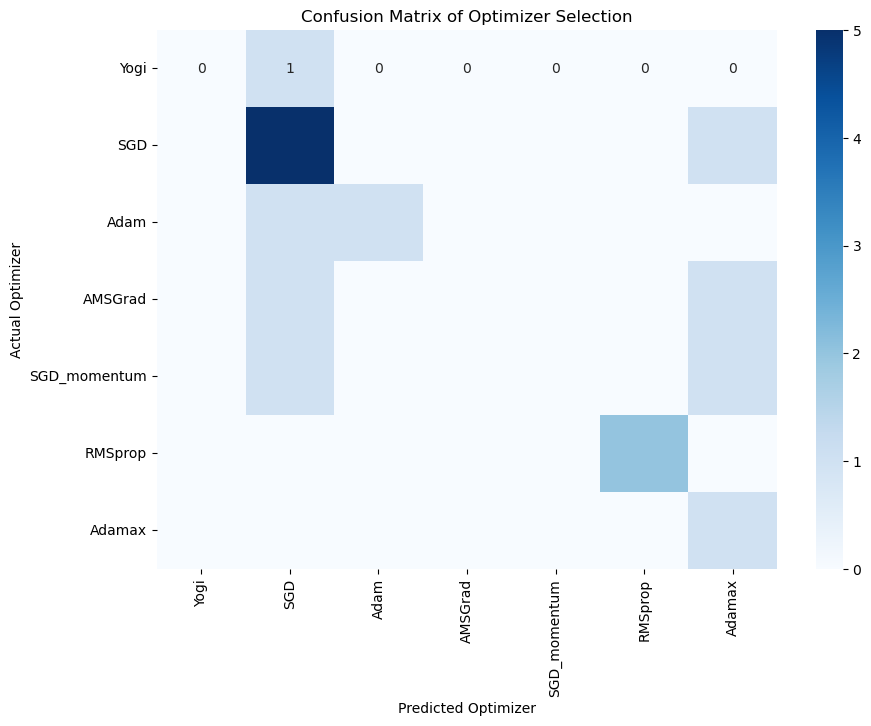

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
        Adam       0.56      0.83      0.67         6
      Adamax       1.00      0.50      0.67         2
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       1.00      1.00      1.00         2
        Yogi       0.25      1.00      0.40         1

    accuracy                           0.56        16
   macro avg       0.40      0.48      0.39        16
weighted avg       0.47      0.56      0.48        16



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    neural_network = row['Neural Network Architecture']
    
     # Rule: If data_size < 1000
    if data_size < 1000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Yogi' # or 'AMSGrad' or 'Adam'
            elif metric == 'Training Time':
                return 'NAG' #or 'SGD_momentum' or 'Nesterov'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam' # or 'Adamax'
            elif metric == 'Training Time':
                return 'Nesterov'# or 'Adam'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam'# or 'AdamW'
            elif metric == 'Training Time':
                return 'AMSGrad'# or 'Adam'
    # Rule: If data_size < 5000
    elif data_size < 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'SGD_momentum'# or 'Yogi'
            elif metric == 'Training Time':
                return 'Adam' #or 'Adagrad'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam'# or 'Adamax' or 'Nadam'
            elif metric == 'Training Time':
                return "SGD_momentum"
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam'# or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    # Rule: If data_size >= 5000
    elif data_size >= 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Adamax'# or 'AdamW'
            elif metric == 'Training Time':
                return 'Adam'# or 'SGD_momentum'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam'# or 'Adamax'
            elif metric == 'Training Time':
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam'# or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    
    # Default case if none of the rules match
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


In [44]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    neural_network = row['Neural Network Architecture']
    
    # Rule: If data_size < 1000
    if data_size < 1000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Yogi' or 'AMSGrad' or 'Adam'
            elif metric == 'Training Time':
                return 'NAG' or 'SGD_momentum' or 'Nesterov'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam' or 'Adamax'
            elif metric == 'Training Time':
                return 'Nesterov' or 'Adam'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'AdamW'
            elif metric == 'Training Time':
                return 'AMSGrad' or 'Adam'
    # Rule: If data_size < 5000
    elif data_size < 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'SGD_momentum' or 'Yogi'
            elif metric == 'Training Time':
                return 'Adam' or 'Adagrad'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam'or 'Adamax' or 'Nadam'
            elif metric == 'Training Time':
                return "SGD_momentum"
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    # Rule: If data_size >= 5000
    elif data_size >= 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Adamax' or 'AdamW'
            elif metric == 'Training Time':
                return 'Adam' or 'SGD_momentum'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam' or 'Adamax'
            elif metric == 'Training Time':
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    
    # Default case if none of the rules match
    return "Use default optimizer (e.g., Adam)"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)
# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
# df['Composite Score'] = df['Normalized F1-score'] * 0.0 + df['Normalized Training Time'] * 1.0
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    # predicted_optimizer = select_optimizer(data_name, 'Training Time', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[0 1 0 0 0 0 0]
 [0 5 0 0 0 0 1]
 [0 1 1 0 0 0 0]
 [0 1 0 0 0 0 1]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
        Adam       0.56      0.83      0.67         6
      Adamax       1.00      0.50      0.67         2
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       1.00      1.00      1.00         2
        Yogi       0.25      1.00      0.40         1

    accuracy                           0.56        16
   macro avg       0.40      0.48      0.39        16
weighted avg       0.47      0.56      0.48        16



C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# import pandas as pd

# def select_optimizer(data_name, metric, row):
#     """
#     Select the best optimizer based on the given data name, evaluation metric,
#     and the information in the provided row of the dataset.

#     Parameters:
#     - data_name: str, name of the dataset
#     - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
#     - row: DataFrame row, row of the dataset containing information about the dataset
    
#     Returns:
#     - str, the selected optimizer
#     """
#     # Extract the necessary values
#     data_size = row['Data Size']
#     neural_network = row['Neural Network Architecture']
    
#     # Rule: If data_size < 1000
#     if data_size < 1000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return 'Yogi' or 'AMSGrad' or 'Adam'
#             elif metric == 'Training Time':
#                 return 'NAG' or 'SGD_momentum' or 'Nesterov'
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return 'Adam' or 'Adamax'
#             elif metric == 'Training Time':
#                 return 'Nesterov' or 'Adam'
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return 'Adam' or 'AdamW'
#             elif metric == 'Training Time':
#                 return 'AMSGrad' or 'Adam'
#     # Rule: If data_size < 5000
#     elif data_size < 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return 'SGD_momentum' or 'Yogi'
#             elif metric == 'Training Time':
#                 return 'Adam' or 'Adagrad'
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return 'Adam'or 'Adamax' or 'Nadam'
#             elif metric == 'Training Time':
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return 'Adam' or 'Yogi'
#             elif metric == 'Training Time':
#                 return 'RMSProp'
#     # Rule: If data_size >= 5000
#     elif data_size >= 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return 'Adamax' or 'AdamW'
#             elif metric == 'Training Time':
#                 return 'Adam' or 'SGD_momentum'
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return 'Adam' or 'Adamax'
#             elif metric == 'Training Time':
#                 return 'SGD_momentum'
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return 'Adam' or 'Yogi'
#             elif metric == 'Training Time':
#                 return 'RMSProp'
    
#     # Default case if none of the rules match
#     return "Adam"

# def evaluate_algorithm(csv_file, metric):
#     """
#     Evaluate the performance of the decision rule algorithm by comparing the selected optimizers
#     against the actual performance metrics from the dataset provided in the CSV file.

#     Parameters:
#     - csv_file: str, path to the CSV file containing dataset information
#     - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    
#     Returns:
#     - DataFrame, the comparison results including the selected optimizer and actual performance
#     """
#     df = pd.read_csv(csv_file)
    
#     results = []
    
#     for index, row in df.iterrows():
#         data_name = row['Data Name']
#         selected_optimizer = select_optimizer(data_name, metric, row)
        
#         actual_best_optimizer = row['Optimization Method']
#         test_accuracy = row['Test Accuracy']
        
#         results.append({
#             'Data Name': data_name,
#             'Selected Optimizer': selected_optimizer,
#             'Actual Best Optimizer': actual_best_optimizer,
#             'Test Accuracy': test_accuracy
#         })
    
#     results_df = pd.DataFrame(results)
#     return results_df

# # Example usage:
# csv_file = 'neural_network_results-15-05.csv'  # Path to the CSV file
# metric = 'Training Time'

# results_df = evaluate_algorithm(csv_file, metric)
# print(results_df)

# # Save the results to a CSV file
# # results_df.to_csv('/mnt/data/optimizer_evaluation_results.csv', index=False)


           Data Name Selected Optimizer Actual Best Optimizer  Test Accuracy
0    Aquatic mammals       SGD_momentum                   SGD       0.650000
1    Aquatic mammals       SGD_momentum          SGD_momentum       0.690000
2    Aquatic mammals       SGD_momentum              Nesterov       0.713333
3    Aquatic mammals       SGD_momentum               RMSprop       0.743333
4    Aquatic mammals       SGD_momentum               Adagrad       0.616667
..               ...                ...                   ...            ...
199          Vehicle       SGD_momentum               AMSGrad       0.820000
200          Vehicle       SGD_momentum                 AdamW       0.830000
201          Vehicle       SGD_momentum                  Yogi       0.772000
202          Vehicle       SGD_momentum                 Nadam       0.818000
203          Vehicle       SGD_momentum                Adamax       0.854000

[204 rows x 4 columns]


In [64]:
import pandas as pd

def select_optimizer(data_name, metric, csv_file):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided CSV file.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - csv_file: str, path to the CSV file containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    neural_network = row['Neural Network Architecture']
    
 # Rule: If data_size < 1000
    if data_size < 1000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Yogi' or 'AMSGrad' or 'Adam'
            elif metric == 'Training Time':
                return 'NAG' or 'SGD_momentum' or 'Nesterov'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam' or 'Adamax'
            elif metric == 'Training Time':
                return 'Nesterov' or 'Adam'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'AdamW'
            elif metric == 'Training Time':
                return 'AMSGrad' or 'Adam'
    # Rule: If data_size < 5000
    elif data_size < 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'SGD_momentum' or 'Yogi'
            elif metric == 'Training Time':
                return 'Adam' or 'Adagrad'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam'or 'Adamax' or 'Nadam'
            elif metric == 'Training Time':
                return "SGD_momentum"
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    # Rule: If data_size >= 5000
    elif data_size >= 5000:
        if neural_network == 'FNN':
            if metric == 'F1-score':
                return 'Adamax' or 'AdamW'
            elif metric == 'Training Time':
                return 'Adam' or 'SGD_momentum'
        elif neural_network == 'CNN':
            if metric == 'F1-score':
                return 'Adam' or 'Adamax'
            elif metric == 'Training Time':
                return 'SGD_momentum'
        elif neural_network == 'LSTM':
            if metric == 'F1-score':
                return 'Adam' or 'Yogi'
            elif metric == 'Training Time':
                return 'RMSProp'
    
    # Default case if none of the rules match
    return "Use default optimizer (e.g., Adam)"

# Example usage:
data_name = 'Titanic'
metric = 'F1-score'
csv_file = 'neural_network_results-15-05.csv'  # Path to the CSV file

optimizer = select_optimizer(data_name, metric, csv_file) 
print(f"The selected optimizer is: {optimizer}")


The selected optimizer is: Yogi


In [15]:
# import pandas as pd

# def select_optimizer_from_csv(file_path, neural_network, metric):
#     """
#     Select the best optimizer based on the given CSV file, neural network architecture,
#     and evaluation metric.

#     Parameters:
#     - file_path: str, path to the CSV file containing the dataset information
#     - neural_network: str, type of neural network architecture (e.g., 'CNN', 'FNN', 'LSTM')
#     - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    
#     Returns:
#     - str, the selected optimizer
#     """
#     # Load the CSV file
#     df = pd.read_csv(file_path)
    
#     # Get the data size from the 'Data Size' feature
#     data_size = df['Data Size'].iloc[0]
    
#     # Rule: If data_size < 1000
#     if data_size < 1000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "Yogi, AMSGrad or Adam"
#             elif metric == 'Training Time':
#                 return "NAG, SGD-momentum or Nesterov"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam or Adamax"
#             elif metric == 'Training Time':
#                 return "Nesterov or Adam"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or AdamW"
#             elif metric == 'Training Time':
#                 return "AMSGrad or Adam"
#     # Rule: If data_size < 5000
#     elif data_size < 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "SGD-momentum or Yogi"
#             elif metric == 'Training Time':
#                 return "Adam or Adagrad"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam, Adamax or Nadam"
#             elif metric == 'Training Time':
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or Yogi"
#             elif metric == 'Training Time':
#                 return "RMSProp"
#     # Rule: If data_size >= 5000
#     elif data_size >= 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "Adamax or AdamW"
#             elif metric == 'Training Time':
#                 return "Adam or SGD_momentum"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam or Adamax"
#             elif metric == 'Training Time':
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or Yogi"
#             elif metric == 'Training Time':
#                 return "RMSProp"
    
#     # Default case if none of the rules match
#     return "Use default optimizer (e.g., Adam)"

# # Example usage:
# file_path = 'neural_network_results-15-05.csv'
# neural_network = 'CNN'
# metric = 'F1-score'

# optimizer = select_optimizer_from_csv(file_path, neural_network, metric)
# print(f"The selected optimizer is: {optimizer}")


In [16]:
# import pandas as pd

# def select_optimizer_from_row(data_size, neural_network, metric):
#     """
#     Select the best optimizer based on the given data size, neural network architecture,
#     and evaluation metric.

#     Parameters:
#     - data_size: int, size of the dataset
#     - neural_network: str, type of neural network architecture (e.g., 'CNN', 'FNN', 'LSTM')
#     - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    
#     Returns:
#     - str, the selected optimizer
#     """
    
#     # Rule: If data_size < 1000
#     if data_size < 1000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "Yogi, AMSGrad or Adam"
#             elif metric == 'Training Time':
#                 return "NAG, SGD-momentum or Nesterov"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam or Adamax"
#             elif metric == 'Training Time':
#                 return "Nesterov or Adam"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or AdamW"
#             elif metric == 'Training Time':
#                 return "AMSGrad or Adam"
#     # Rule: If data_size < 5000
#     elif data_size < 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "SGD-momentum or Yogi"
#             elif metric == 'Training Time':
#                 return "Adam or Adagrad"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam, Adamax or Nadam"
#             elif metric == 'Training Time':
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or Yogi"
#             elif metric == 'Training Time':
#                 return "RMSProp"
#     # Rule: If data_size >= 5000
#     elif data_size >= 5000:
#         if neural_network == 'FNN':
#             if metric == 'F1-score':
#                 return "Adamax or AdamW"
#             elif metric == 'Training Time':
#                 return "Adam or SGD_momentum"
#         elif neural_network == 'CNN':
#             if metric == 'F1-score':
#                 return "Adam or Adamax"
#             elif metric == 'Training Time':
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if metric == 'F1-score':
#                 return "Adam or Yogi"
#             elif metric == 'Training Time':
#                 return "RMSProp"
    
#     # Default case if none of the rules match
#     return "Use default optimizer (e.g., Adam)"

# # Load the CSV file
# file_path = 'neural_network_results-15-05.csv'
# df = pd.read_csv(file_path)

# # Initialize a list to store the results
# results = []

# # Iterate over each row to evaluate the algorithm
# for index, row in df.iterrows():
#     data_size = row['Data Size']
#     neural_network = row['Neural Network Architecture']
#     metric = 'F1-score'  # You can change this to evaluate other metrics as well
    
#     # Get the selected optimizer
#     selected_optimizer = select_optimizer_from_row(data_size, neural_network, metric)
    
#     # Append the result
#     results.append({
#         'Data Name': row['Data Name'],
#         'Data Size': data_size,
#         'Neural Network Architecture': neural_network,
#         'Metric': metric,
#         'Selected Optimizer': selected_optimizer,
#         'Actual Optimizer': row['Optimization Method']
#     })

# # Convert the results to a DataFrame for better visualization
# results_df = pd.DataFrame(results)

# # Display the results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Optimizer Selection Results", dataframe=results_df)

# # Calculate the accuracy of the selection (if actual optimizer is known and can be compared)
# accuracy = (results_df['Selected Optimizer'] == results_df['Actual Optimizer']).mean()
# print(f"Optimizer selection accuracy: {accuracy * 100:.2f}%")


In [17]:
# def select_optimizer(data_size, neural_network, metric, is_f1):
#     """
#     Select the best optimizer based on the given data size, neural network architecture,
#     evaluation metric, and whether the metric is F1-score.

#     Parameters:
#     - data_size: int, size of the dataset
#     - neural_network: str, type of neural network architecture (e.g., 'CNN', 'FNN', 'LSTM')
#     - metric: str, evaluation metric (e.g., 'Training Time', 'F1-score')
#     - F1-score: bool, whether the metric is F1-score
#     - Training Time: bool, whether the metric is Training Time
    
#     Returns:
#     - str, the selected optimizer
#     """
    
#     # Rule: If data_size < 1000
#     if data_size < 1000:
#         if neural_network == 'FNN':
#             if F1-score:
#                 return "Yogi, AMSGrad or Adam"
#             elif Training Time:
#                 return "NAG, SGD-momentum or Nesterov"
#         elif neural_network == 'CNN':
#             if F1-score:
#                 return "Adam or Adamax"
#             elif Training Time:
#                 return "Nesterov or Adam"
#         elif neural_network == 'LSTM':
#             if F1-score:
#                 return "Adam or AdamW"
#             elif Training Time:
#                 return "AMSGrad or Adam"
#     # Rule: If data_size < 5000
#     elif data_size < 5000:
#         if neural_network == 'FNN':
#             if F1-score:
#                 return "SGD-momentum or Yogi"
#             elif Training Time:
#                 return "Adam or Adagrad"
#         elif neural_network == 'CNN':
#             if F1-score:
#                 return "Adam ,Adamax or Nadam "
#             elif Training Time:
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if F1-score:
#                 return "Adam or Yogi"
#             elif Training Time:
#                 return "RMSProp"
#     # Rule: If data_size >= 5000
#      elif data_size >= 5000:
#         if neural_network == 'FNN':
#             if F1-score:
#                 return "Adamax or AdamW"
#             elif Training Time:
#                 return "Adam or SGD_momentum"
#         elif neural_network == 'CNN':
#             if F1-score:
#                 return "Adam or Adamax"
#             elif Training Time:
#                 return "SGD_momentum"
#         elif neural_network == 'LSTM':
#             if F1-score:
#                 return "Adam or Yogi"
#             elif Training Time:
#                 return "RMSProp"
    
#     # Default case if none of the rules match
#     return "Use default optimizer (e.g., Adam)"

# # Example usage:
# data_size = 1500
# neural_network = 'CNN'
# metric = 'F1-score'
# is_f1 = (metric == 'F1')

# optimizer = select_optimizer(data_size, neural_network, metric, is_f1)
# print(f"The selected optimizer is: {optimizer}")
